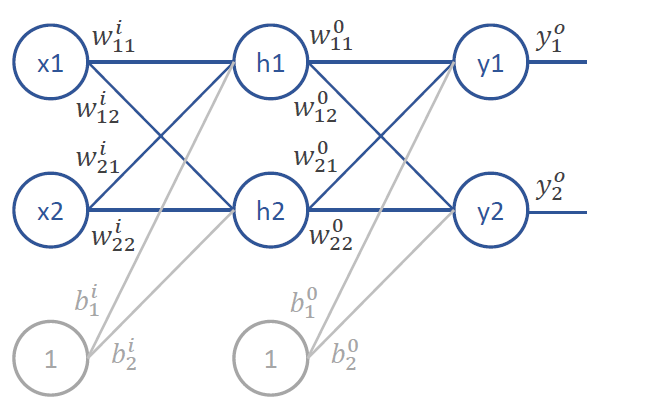

In [10]:
import numpy as np
import pandas as pd

# Función Escalón:
def step(x):
    return np.where(x > 0, 1, 0)

# Función Sigmoide:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función Tangente Hiperbólica (Tanh):
def tanh(x):
    return np.tanh(x)

# Función ReLU (Rectified Linear Unit):
def relu(x):
    return np.maximum(0, x)

################################################################################

def activacion(function,x):
    if function == 'step': # Función Escalón
      return np.where(x > 0, 1, 0)
    elif function == 'sigmoid': # Función Sigmoide
      return 1 / (1 + np.exp(-x))
    elif function == 'tanh': # Función Tangente Hiperbólica (Tanh)
      return np.tanh(x)
    elif function == 'relu':  # Función ReLU (Rectified Linear Unit)
        return np.maximum(0, x)
    else:
        return x

################################################################################

# Las entradas de la red
x1 = 0.05
x2 = 0.10
# Las salidas deseadas
y1 = 0.01
y2 = 0.99
# La inicialización de los pesos
w1 = w1_orig = 0.15
w2 = w2_orig = 0.2
w3 = w3_orig = 0.25
w4 = w4_orig = 0.3
w5 = w5_orig = 0.4
w6 = w6_orig = 0.45
w7 = w7_orig = 0.5
w8 = w8_orig = 0.55

#---------------

b11 = b11_orig = 0.35
b12 = b12_orig = 0.35
b21 = b21_orig = 0.6
b22 = b22_orig = 0.6

epoch = 0
total_error = 0
total_error_orig = 0

################### Inicio Loop

while True:
  epoch += 1

  #for epoch in range(5000):

  # FEEDFORWARD

  '''
  net_h1 = x1 * w1 + x2 * w3 + b11
  net_h2 = x1 * w2 + x2 * w4 + b12
  out_h1 = sigmoid(net_h1)
  out_h2 = sigmoid(net_h2)
  net_y1 = out_h1 * w5 + out_h2 * w7 + b21
  net_y2 = out_h1 * w6 + out_h2 * w8 + b22
  yo1 = sigmoid(net_y1)
  yo2 = sigmoid(net_y2)
  '''

  net_h1 = x1 * w1 + x2 * w3 + b11
  net_h2 = x1 * w2 + x2 * w4 + b12
  out_h1 = activacion('relu',net_h1)
  out_h2 = activacion('relu',net_h2)
  net_y1 = out_h1 * w5 + out_h2 * w7 + b21
  net_y2 = out_h1 * w6 + out_h2 * w8 + b22
  yo1 = activacion('relu',net_y1)
  yo2 = activacion('relu',net_y2)




  # Separo el Error Incial y dejo el ultimo para ver las diferencias en un Data dataframe
  if epoch == 1:
     total_error_orig = total_error = 0.5 * (y1 - yo1)**2 + 0.5 * (y2 - yo2)**2
  else:
     total_error = 0.5 * (y1 - yo1)**2 + 0.5 * (y2 - yo2)**2

  resultado =   "epoch: " + str(epoch) + ", Valores de Salida y1: " + str(np.round(yo1, 2)) + ", y2: " + str(np.round(yo2, 2)) +  ", Error: " + str(total_error)

  # Si llegamos a los valores Objetivos de y1 e y2, salgo del Loop, si no hago otra backpropagation para proximo ajuste

  if np.round(yo1, 2) == y1 and np.round(yo2, 2) == y2:
     break
  else:

  # BACKPROPAGATION "vamos de atraz para adelante"

  # Actualización de los parámetros de la capa oculta - capa salida.
   eta = 0.5

   delta_21 = yo1 * (1 - yo1) * (yo1 - y1)
   delta_22 = yo2 * (1 - yo2) * (yo2 - y2)

   w5 = w5 - eta * out_h1 * delta_21
   w6 = w6 - eta * out_h1 * delta_22
   w7 = w7 - eta * out_h2 * delta_21
   w8 = w8 - eta * out_h2 * delta_22

   b21 = b21 - eta * delta_21
   b22 = b22 - eta * delta_22

   # Actualización de los parámetros de la capa entrada - capa oculta.

   delta_11 = out_h1 * (1 - out_h1) * (w5 * delta_21 + w6 * delta_22)
   delta_12 = out_h2 * (1 - out_h2) * (w7 * delta_21 + w8 * delta_22)

   w1 = w1 - eta * x1 * delta_11
   w2 = w2 - eta * x1 * delta_12
   w3 = w3 - eta * x2 * delta_11
   w4 = w8 - eta * x2 * delta_12

   b11 = b11 - eta * delta_11
   b12 = b12 - eta * delta_22

################### Fin Loop

print("Valores de Entrada, X1: " , x1 , " , X2: " , x2)
print("")
print("Valores de Salida, Y1: " , y1 , " , Y2: " , y2)
print("")
print ("Salida de la Red Neuronal: ", resultado)
print("")
print("Valores W, b y ERROR, antes y después de la Red Neuronal")
print("")

# Crear el DataFrame con los nombres de columnas
column_names = ["","W1", "W2", "W3", "W4", "W5", "W6", "W7", "W8", "b11", "b12", "b21", "b22", "ERROR"]

# Ejemplo de medidas de evaluación
data = [
    ["ORIGINAL", w1_orig, w2_orig, w3_orig, w4_orig, w5_orig, w6_orig, w7_orig, w8_orig, b11_orig, b12_orig, b21_orig, b22_orig, total_error_orig],
    ["AJUSTADO", w1, w2, w3, w4, w5, w6, w7, w8, b11, b12, b21, b22, total_error]
]

df = pd.DataFrame(data, columns=column_names)

# Imprimir el DataFrame
display(df)


Valores de Entrada, X1:  0.05  , X2:  0.1

Valores de Salida, Y1:  0.01  , Y2:  0.99

Salida de la Red Neuronal:  epoch: 183, Valores de Salida y1: 0.01, y2: 0.99, Error: 1.2954174185253472e-05

Valores W, b y ERROR, antes y después de la Red Neuronal



,,W1,W2,W3,W4,W5,W6,W7,W8,b11,b12,b21,b22,ERROR
0,ORIGINAL,0.15000,0.200000,0.250000,0.300000,0.400000,0.450000,0.500000,0.550000,0.350000,0.350000,0.600000,0.600000,0.439928
1,AJUSTADO,0.14786,0.197044,0.245721,0.551798,0.142544,0.451468,0.202422,0.551798,0.307207,0.354313,-0.118277,0.604313,0.000013


In [ ]:

# Aca hago un sólo un FEEDFORWARD con los valores de W y b anteriores ajustados, para que me de el 1° resultado de salida de y1 e y2 anterior

net_h1 = x1 * w1 + x2 * w3 + b11
net_h2 = x1 * w2 + x2 * w4 + b12
out_h1 = sigmoid(net_h1)
out_h2 = sigmoid(net_h2)
net_y1 = out_h1 * w5 + out_h2 * w7 + b21
net_y2 = out_h1 * w6 + out_h2 * w8 + b22
yo1 = sigmoid(net_y1)
yo2 = sigmoid(net_y2)
total_error = 0.5 * (y1 - yo1)**2 + 0.5 * (y2 - yo2)**2
print("")
print("Valores de Salida y1:", np.round(yo1, 2) ,", y2:" ,np.round(yo2, 2), ", Error:", total_error)


Valores de Salida y1: 0.01 , y2: 0.99 , Error: 2.4403179775674046e-05
